In [1]:
import matplotlib.pyplot as plt  # 导入 matplotlib 库，用于图像显示
from PIL import Image  # 导入 PIL 库，用于图像加载和处理
import torchvision.transforms as transforms  # 导入 torchvision.transforms 模块，用于图像预处理
import torch
import torch.nn as nn

In [6]:
transform = transforms.Compose([transforms.Resize((256,256)),transforms.ToTensor()])
image_path = 'Apple.jpg'
image = Image.open(image_path)
image_tensor = transform(image)
image_tensor = image_tensor + 0.5 * torch.randn_like(image_tensor)
image_tensor = torch.clamp(image_tensor,0.,1.)
print(image_tensor.shape)
print(image_tensor[0,128])

torch.Size([3, 256, 256])
tensor([0.6537, 1.0000, 1.0000, 1.0000, 1.0000, 0.9635, 0.8452, 0.0000, 1.0000,
        0.9436, 0.3460, 1.0000, 0.6506, 0.5774, 0.6503, 1.0000, 0.7003, 0.2458,
        1.0000, 1.0000, 0.6516, 0.0453, 1.0000, 1.0000, 1.0000, 0.5588, 0.2150,
        0.0681, 0.2953, 0.4333, 0.3730, 0.4034, 0.7012, 0.2624, 0.2584, 1.0000,
        1.0000, 0.6007, 0.2069, 0.0000, 0.7194, 0.4031, 0.0000, 0.1223, 0.0680,
        0.6289, 0.6879, 0.2429, 0.4907, 0.2202, 0.3419, 0.3599, 0.8321, 0.6976,
        0.2449, 0.3022, 1.0000, 1.0000, 1.0000, 0.0398, 0.7808, 0.4747, 1.0000,
        0.6814, 0.0000, 0.6685, 0.7059, 0.5406, 0.0000, 0.4815, 0.1464, 0.9448,
        0.8833, 0.0000, 0.5118, 0.2204, 1.0000, 0.1249, 1.0000, 0.0860, 0.1638,
        0.0000, 0.4014, 0.9574, 1.0000, 0.7510, 0.2509, 1.0000, 0.8046, 1.0000,
        0.6515, 0.8489, 0.5759, 0.1633, 0.7421, 0.4548, 0.6647, 0.9853, 0.5726,
        0.7655, 0.0000, 0.0000, 1.0000, 0.3146, 0.9316, 1.0000, 0.5671, 0.3531,
        0.7759

In [7]:
image_numpy = image_tensor.numpy().transpose((1, 2, 0))
print(image_numpy.shape)

(256, 256, 3)


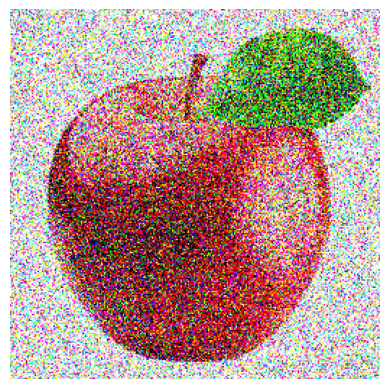

In [8]:
plt.imshow(image_numpy)
plt.axis('off')
plt.show()

In [9]:
# 创建神经网络模型
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.Conv2d(16,8,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.decoder = nn.Sequential(
            # HO = (Hin - 1) .s -2p +k + op
            nn.ConvTranspose2d(8,16,kernel_size=3,stride=2,padding=1,output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16,3,kernel_size=3,stride=2,padding=1,output_padding=1),
            nn.Sigmoid() # 输出转化为0到1范围
        )
    def forward(self, x):
        x = self.encoder(x)
        # print(f"encode shape:{x.shape}")
        x = self.decoder(x)
        # print(f"decode shape:{x.shape}")
        return x
model = AutoEncoder()
x = model(torch.rand((3,256,256)))

In [10]:
# 训练数据
import torch.optim as optim

In [11]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=1e-3)
epochs = 500
for epoch in range(epochs):
    output = model(image_tensor)
    loss = loss_fn(output, image_tensor)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (epoch+1) % 10 == 0:
        print(f"epoch:{epoch+1}/{epochs},loss:{loss.item()}")


epoch:10/500,loss:0.15128743648529053
epoch:20/500,loss:0.14226186275482178
epoch:30/500,loss:0.1374167799949646
epoch:40/500,loss:0.13287581503391266
epoch:50/500,loss:0.12647177278995514
epoch:60/500,loss:0.11932897567749023
epoch:70/500,loss:0.11482622474431992
epoch:80/500,loss:0.1106092557311058
epoch:90/500,loss:0.10615545511245728
epoch:100/500,loss:0.10298863053321838
epoch:110/500,loss:0.10117610543966293
epoch:120/500,loss:0.09999212622642517
epoch:130/500,loss:0.09915285557508469
epoch:140/500,loss:0.09854788333177567
epoch:150/500,loss:0.09805526584386826
epoch:160/500,loss:0.0976274386048317
epoch:170/500,loss:0.09724175184965134
epoch:180/500,loss:0.09687822312116623
epoch:190/500,loss:0.0965496376156807
epoch:200/500,loss:0.09613830596208572
epoch:210/500,loss:0.0956885889172554
epoch:220/500,loss:0.09516573697328568
epoch:230/500,loss:0.09459380060434341
epoch:240/500,loss:0.09405220299959183
epoch:250/500,loss:0.0936049148440361
epoch:260/500,loss:0.09324920177459717
e

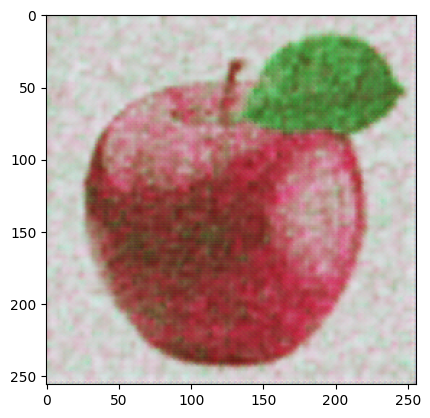

In [12]:
# 重构图像（推理）
with torch.no_grad():
    output = model(image_tensor)
image_numpy = output.numpy().transpose((1, 2, 0))
plt.imshow(image_numpy)
plt.show()
